## Лабораторная работа 2 – Вариант 3 

1. Набор данных: **cherry_blossoms**

2. Независимая переменная: **temp** 

3. Зависимая переменная: **temp_upper** 

4. Доп. признак: **имеющий максимальную дисперсию** 

5. Визуализация доп. признака – **столбчатая диаграмма** 

6. Показатель качества регрессии – **MAE (mean absolute error)** 

7. Степень полинома: **4** 

8. Параметры глубокой нейронной сети: **кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – гиперболический тангенс**. 

In [120]:
#importing the needed packages
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). 

In [121]:
#loading the data from tensorflow_datasets
ds = tfds.load('cherry_blossoms', split='train', shuffle_files=True)

# Convert to dataframe
df = tfds.as_dataframe(ds)

# Split into train and test sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Reset the index
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [122]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doy         827 non-null    float32
 1   temp        1124 non-null   float32
 2   temp_lower  1124 non-null   float32
 3   temp_upper  1124 non-null   float32
 4   year        1215 non-null   int32  
dtypes: float32(4), int32(1)
memory usage: 23.9 KB


In [123]:
X=df['temp'].dropna()
y=df['temp_upper'].dropna()

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((786,), (338,), (786,), (338,))

2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.  

**Степень полинома: 4**

In [125]:
X.info()

<class 'pandas.core.series.Series'>
Int64Index: 1124 entries, 0 to 1214
Series name: temp
Non-Null Count  Dtype  
--------------  -----  
1124 non-null   float32
dtypes: float32(1)
memory usage: 13.2 KB


In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)

X_train = poly.fit_transform(X_train.values.reshape(-1,1))
X_test=poly.transform(X_test.values.reshape(-1,1))

reg2_model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1])),
    tf.keras.layers.Dense(units=1)
])

reg2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

history = reg2_model.fit(
    X_train, y_train, 
    epochs=100,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация)
    validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 188.0344 - val_loss: 39.6409
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 27.0180 - val_loss: 12.2043
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 8.2405 - val_loss: 5.2406
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 5.3236 - val_loss: 4.6482
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 4.4581 - val_loss: 3.4454
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 3.5180 - val_loss: 3.3002
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8132 - val_loss: 1.8739
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 1.5616 - val_loss: 1.0738
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9590 - val_loss: 0.6847
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 1.2450 - val_loss: 0.9210
Epo

In [127]:
from sklearn.metrics import mean_absolute_error
y_pred_test=reg2_model.predict(X_test)
mae_test=mean_absolute_error(y_test, y_pred_test)
print("MAE: ", mae_test)

11/11 [==============================] - 0s 2ms/step
MAE:  0.78787464


3. Постройте кривые обучения с зависимостью от количества эпох.

In [128]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])*2])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

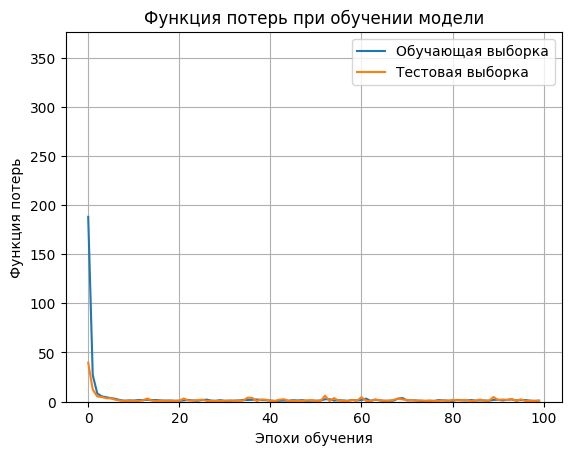

In [129]:
plot_loss(history)

4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок. 

In [130]:
X_train.shape, y_train.shape, X_test.shape, y_pred_test.shape

((786, 5), (786,), (338, 5), (338, 1))

In [131]:
y_pred_test.shape

(338, 1)

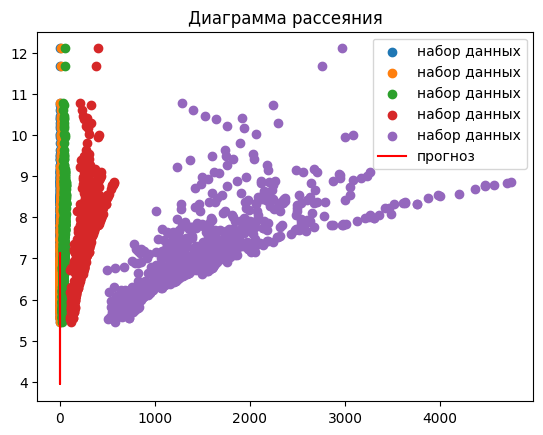

In [140]:
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], y_train, label='набор данных')
ax.scatter(X_train[:, 1], y_train, label='набор данных')
ax.scatter(X_train[:, 2], y_train, label='набор данных')
ax.scatter(X_train[:,3], y_train, label='набор данных')
ax.scatter(X_train[:,4], y_train, label='набор данных')
ax.plot(np.sort(X_test[:, 0]), y_pred_test[np.argsort(X_test[:, 0])], color='r', label='прогноз')
ax.set_title('Диаграмма рассеяния')
ax.legend()
plt.show()

Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.

**имеющий максимальную дисперсию**

In [141]:
variance=df.var()
print(variance)
max_var = variance.idxmax()
print(f'Max variance: {variance.max()}')
z=np.array(df[max_var])
z.shape

doy               41.050114
temp               0.440428
temp_lower         0.723094
temp_upper         0.985891
year          123120.000000
dtype: float64
Max variance: 123120.0


(1215,)

6. Визуализируйте этот признак в соответствии с индивидуальным заданием.  

Визуализация доп. признака – столбчатая диаграмма

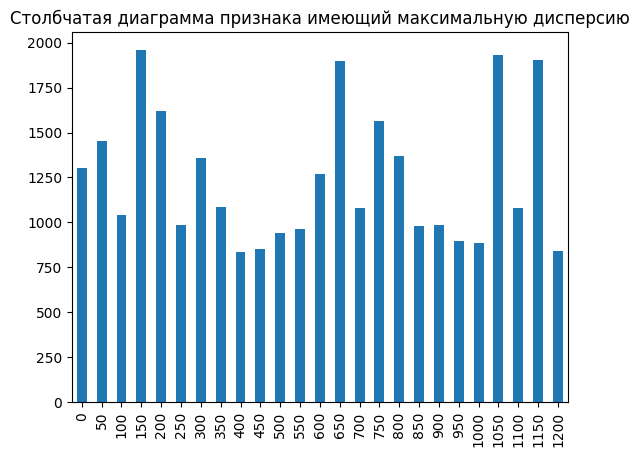

In [142]:
df[::50][max_var].plot.bar(title='Столбчатая диаграмма признака имеющий максимальную дисперсию');

7. Сформируйте набор входных данных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков. 

In [143]:
X=df[['temp', 'temp_lower']].dropna()
y=df['temp_upper'].dropna()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)


In [144]:
normalizer=tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1:]))
feature_normalizer=normalizer.adapt(X_train)

8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика.

Степень полинома: 4

Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – гиперболический тангенс.

In [145]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((786, 2), (338, 2), (786,), (338,))

Всего в обучающей выборке 850 точка, начнем с 11 точек и будем прибавлять по 10 точек на каждом шаге цикла:

In [147]:
large_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

large_model.compile(loss='mse')


train_score = []
test_score = []
history=[]
for i in range(16, 787, 110):
  history.append(large_model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test)))
  y_train_predict = large_model.predict(X_train[:i])
  train_score.append(mean_absolute_error(y_train[:i], y_train_predict))
  y_test_predict = large_model.predict(X_test)
  test_score.append(mean_absolute_error(y_test, y_test_predict))
  print('-->', i, ' done')

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 9.6828 - val_loss: 0.2458
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2100 - val_loss: 0.2549
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2055 - val_loss: 0.2534
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2036 - val_loss: 0.2023
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1716 - val_loss: 0.2265
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.1820 - val_loss: 0.1387
Epoch 7/100
25/25 [==============================] - 0s 12ms/step - loss: 0.1492 - val_loss: 0.1466
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1481 - val_loss: 0.2618
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 0.1423 - val_loss: 0.2124
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1228 - val_loss: 0.0857
Epoch 

9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве. 

704/704 [==============================] - 1s 2ms/step


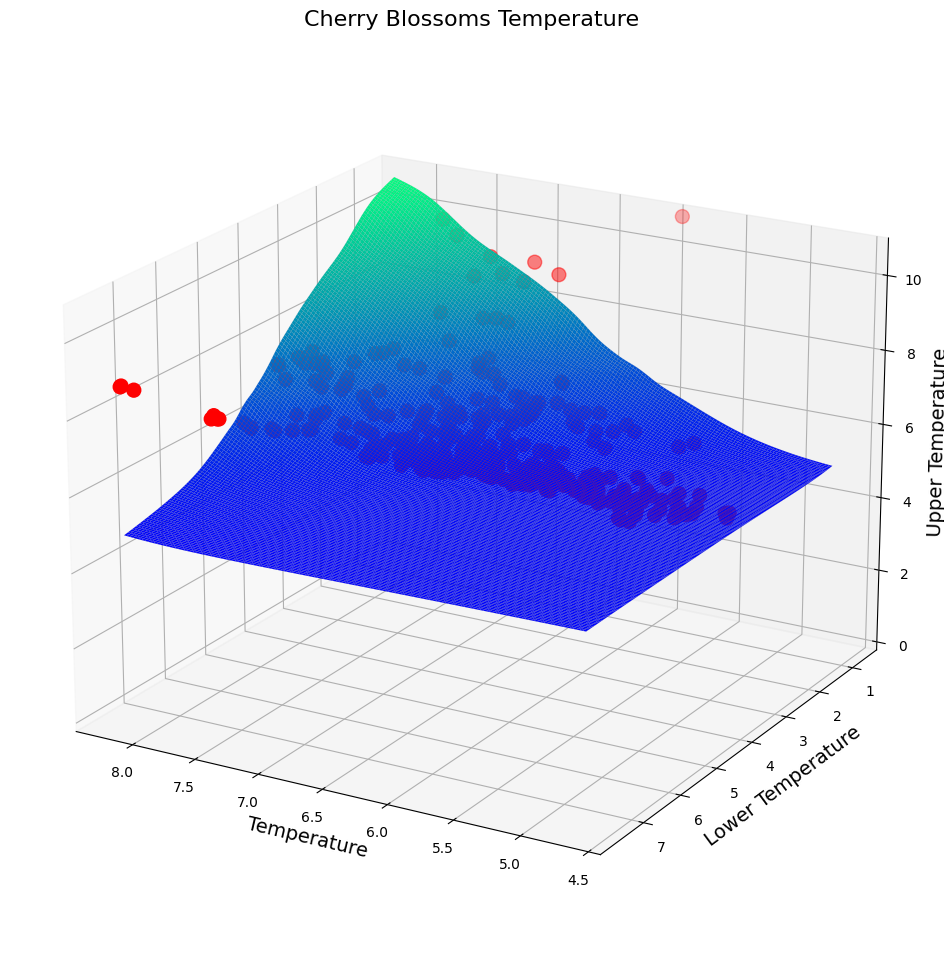

In [148]:
from matplotlib import cm
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

x_mesh, y_mesh=np.meshgrid(np.linspace(X_test['temp'].min(), X_test['temp'].max(),150), \
                           np.linspace(X_test['temp_lower'].min(), X_test['temp_lower'].max(), 150))

z_mesh=large_model.predict(normalizer(np.c_[x_mesh.ravel(), y_mesh.ravel()])).reshape(x_mesh.shape)
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, edgecolors='gray') 

xs=X_test['temp']
ys=X_test['temp_lower']
zs=y_test
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('Temperature', fontsize=14) 
ax.set_ylabel('Lower Temperature', fontsize=14)
ax.set_zlabel('Upper Temperature', fontsize=14) 
ax.set_title('Cherry Blossoms Temperature', fontsize=16)

ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 20, azim = 120)

10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 


In [149]:
len(train_score)

8

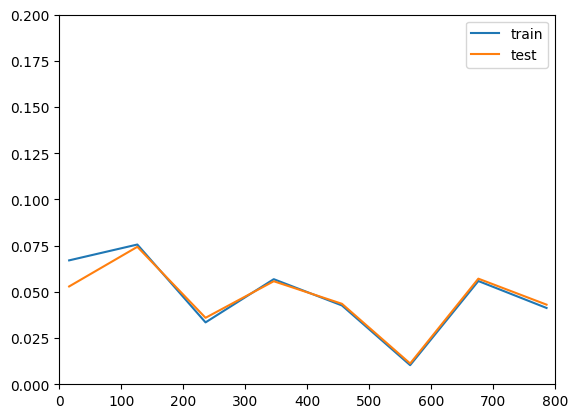

In [150]:
plt.plot([i for i in range(16, len(X_train)+1, 110)], 
                               train_score, label="train")
plt.plot([i for i in range(16, len(X_train)+1, 110)], 
                               test_score, label="test")
plt.axis([0,800, 0, 0.2]);
plt.legend();